 CMD 1- Filters: F336W and F475W 


<Figure size 640x480 with 0 Axes>

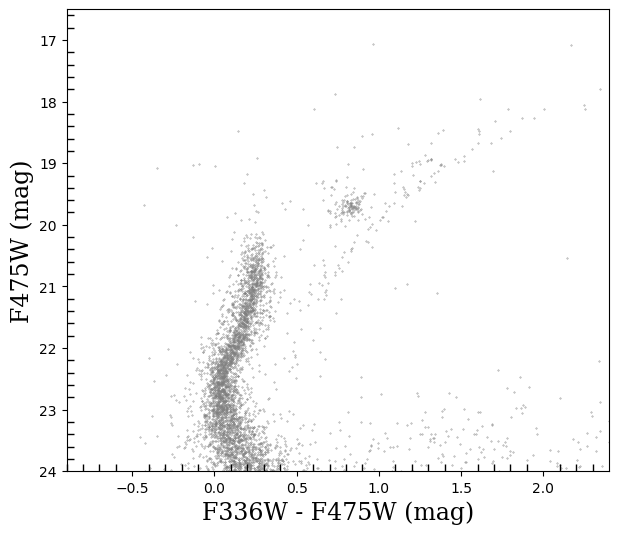

 CMD 2- Filters: F475W and F814W 


<Figure size 640x480 with 0 Axes>

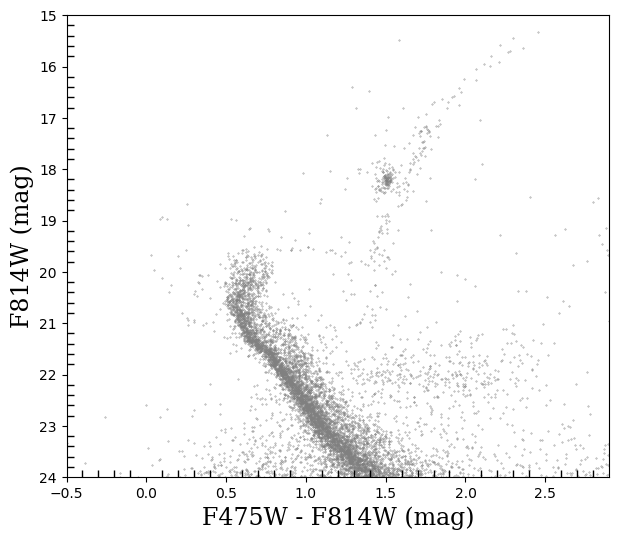

 CMD 3- Filters: F336W and F814W 


<Figure size 640x480 with 0 Axes>

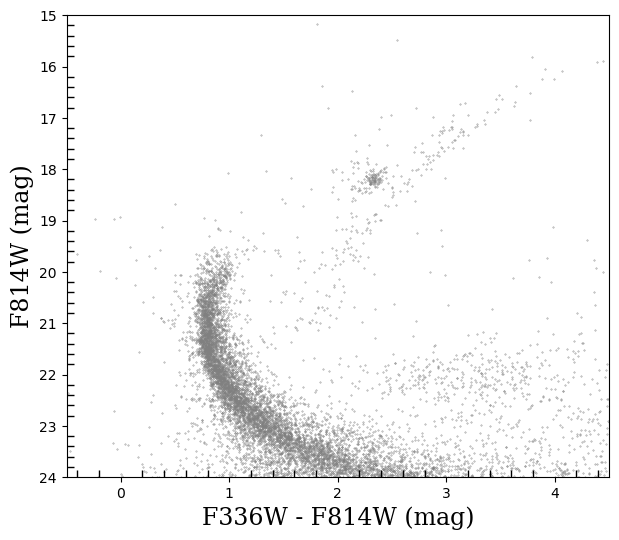

In [5]:
#%matplotlib inline

import time
start_time = time.time()

import math
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import zscore
import matplotlib.ticker as ticker
csfont = {'fontname':'serif'}

data_336_475 = np.loadtxt('NGC_2173_336_475_1.2_CM')
x_data_1 = data_336_475[:,2]   # f336w - f475w
y_data_1 = data_336_475[:,1]   # f475w


data_475_814 = np.loadtxt('NGC_2173_475_814_1.3_CM')
x_data_2 = data_475_814[:,2]   # f475w - f814w
y_data_2 = data_475_814[:,1]   # f814w


data_336_814 = np.loadtxt('336_814_chip_total')
x_data_3 = data_336_814[:,2]   # f336w - f814w
y_data_3 = data_336_814[:,1]   # f814w


print(" CMD 1- Filters: F336W and F475W ")
plt.figure()
plt.style.use("default")
plt.figure(figsize=(7,6))
plt.scatter(x_data_1, y_data_1, 0.1, 'grey')
plt.xlim(-0.9, 2.4)
plt.ylim(16.5, 24.0)
plt.gca().invert_yaxis()
plt.xlabel("F336W - F475W (mag)", fontsize=17, **csfont)
plt.ylabel("F475W (mag)", fontsize=17, **csfont)
plt.minorticks_on()
plt.tick_params(which='minor', length=5, width=1, direction='in')
#plt.text(1.3,18.5,'NGC2173', fontsize=16)
#plt.text(-1.3, 18.5, 'age')
#plt.legend(loc="upper left")
plt.show()

print(" CMD 2- Filters: F475W and F814W ")
plt.figure()
plt.style.use("default")
plt.figure(figsize=(7,6))
plt.scatter(x_data_2, y_data_2, 0.1, 'grey')
plt.xlim(-0.5, 2.9)
plt.ylim(15., 24.0)
plt.gca().invert_yaxis()
plt.xlabel("F475W - F814W (mag)", fontsize=17, **csfont)
plt.ylabel("F814W (mag)", fontsize=17, **csfont)
plt.minorticks_on()
plt.tick_params(which='minor', length=5, width=1, direction='in')
#plt.text(1.3,18.5,'NGC2173', fontsize=16)
#plt.text(-1.3, 18.5, 'age')
#plt.legend(loc="upper left")
plt.show()

print(" CMD 3- Filters: F336W and F814W ")
plt.figure()
plt.style.use("default")
plt.figure(figsize=(7,6))
plt.scatter(x_data_3, y_data_3, 0.1, 'grey')
plt.xlim(-0.5, 4.5)
plt.ylim(15.0, 24.0)
plt.gca().invert_yaxis()
plt.xlabel("F336W - F814W (mag)", fontsize=17, **csfont)
plt.ylabel("F814W (mag)", fontsize=17, **csfont)
plt.minorticks_on()
plt.tick_params(which='minor', length=5, width=1, direction='in')
#plt.text(1.3,18.5,'NGC2173', fontsize=16)
#plt.text(-1.3, 18.5, 'age')
#plt.legend(loc="upper left")
plt.show()

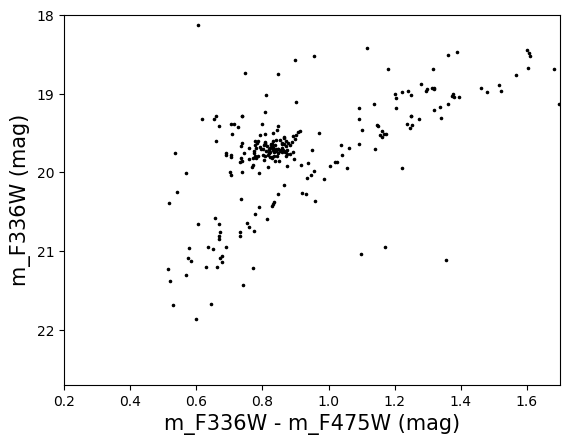

<Figure size 640x480 with 0 Axes>

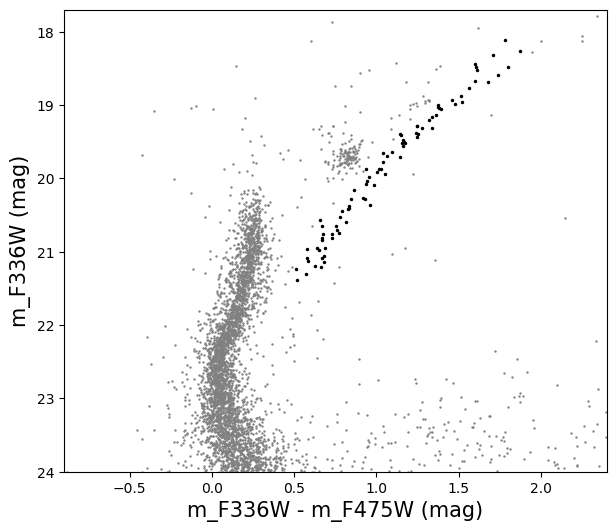

<Figure size 640x480 with 0 Axes>

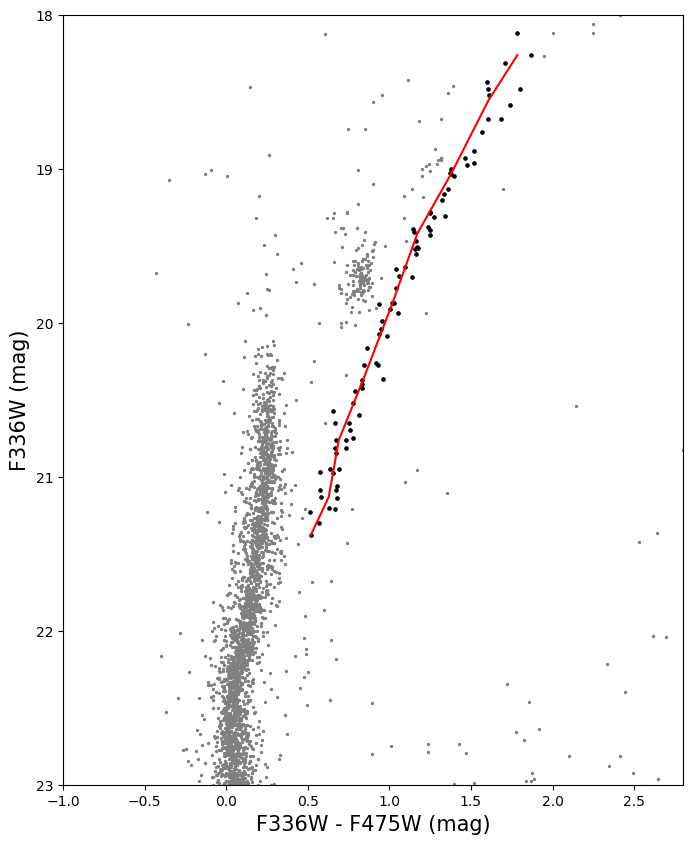

0.06499029898329224


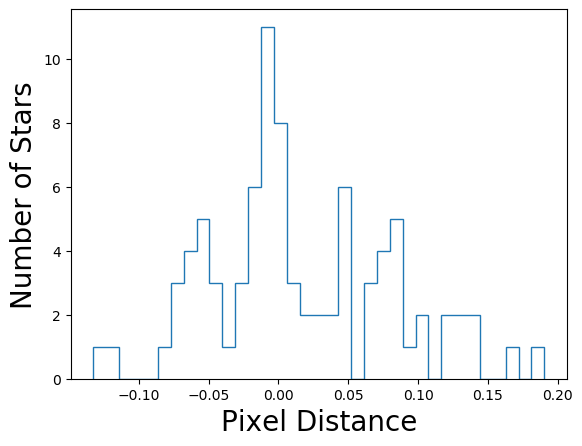

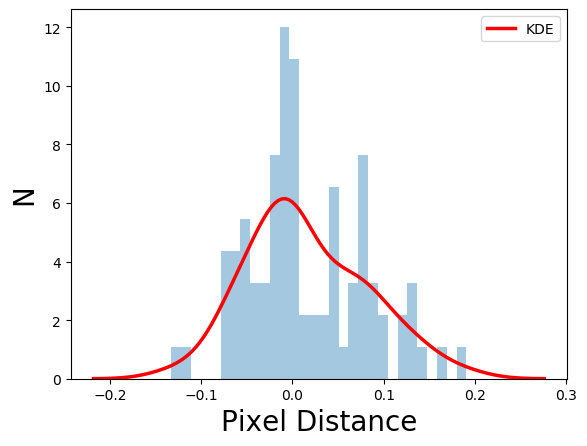

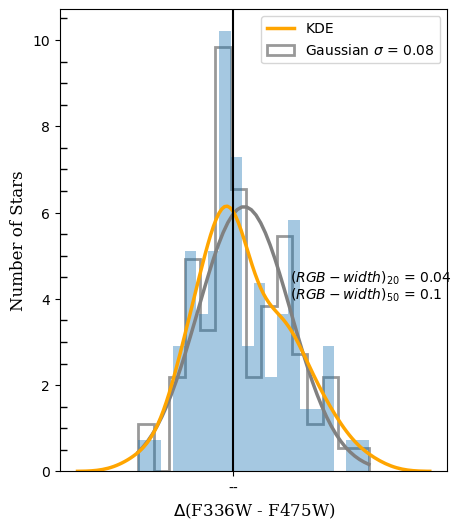

0.015752941176470584 0.06499029898329226
0.03810000000000002
0.09525000000000006


In [15]:
first_df = pd.DataFrame({'x_data_1':x_data_1, 'y_data_1':y_data_1})
#print(len(first_df))
first_df_cut = first_df[(first_df['x_data_1']<=2.2) & (first_df['x_data_1']>= 0.5) & (first_df['y_data_1']<=21.9) & (first_df['y_data_1']>=18.0)]
#print(len(first_df_cut))
first_df_cut.to_csv('first_cut_336_475_alt.csv')
first_df_cut_index = first_df_cut[(first_df_cut.x_data_1 < 0.91) & (first_df_cut.y_data_1 < 20.0)].index.to_numpy()
#print(len(first_df_cut_index))
#first_df_cut_1 = first_df_cut.drop(first_df_cut_index)
first_df_cut_1 = pd.read_csv('RGB_336_475_vs_475_data')

plt.figure()
plt.scatter(first_df_cut.x_data_1, first_df_cut.y_data_1,  2.5, 'black')
plt.xlim(0.2,1.7)
plt.ylim(18.0, 22.7)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
#plt.title("RGB of NGC 411 for F336W and F475W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.style.use("default")
plt.figure(figsize=(7,6))
plt.scatter(x_data_1, y_data_1, 0.5, 'grey')
plt.scatter(first_df_cut_1.x_data_1, first_df_cut_1.y_data_1, 2.2, 'black')
plt.xlim(-0.9,2.4)
plt.ylim(17.7, 24.0)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
#plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

first_df_new= pd.DataFrame({'x_data_1':first_df_cut_1.x_data_1,'y_data_1':first_df_cut_1.y_data_1})
#print(df_new)

first_df1_new = first_df_new[(first_df_new['x_data_1']<=2.8) & (first_df_new['x_data_1']>= 0.5) & (first_df_new['y_data_1']<=21.8) & (first_df_new['y_data_1']>=18.0)]
#print(df1_new)
bins = np.linspace(18.0,21.8, num=10) # These are number of bins

md_1 = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = first_df1_new[(first_df1_new['y_data_1'] >= bins[i]) & (first_df1_new['y_data_1'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_1'])
    y_median = np.median(tempdf['y_data_1'])
    md_1.iloc[i]=[x_median, y_median]
    
#print(md)

plt.figure()
plt.style.use("default")
plt.figure(figsize=(8,10))
plt.scatter(x_data_1, y_data_1, 2.0,  'grey')
plt.scatter(first_df_cut_1.x_data_1, first_df_cut_1.y_data_1, 4.2, 'black')
plt.plot(md_1['x_med'], md_1['y_med'], 'red')
plt.scatter(first_df1_new['x_data_1'], first_df1_new['y_data_1'], 4.2, 'black', zorder=0) # zorder= is used when you are lazy. 
plt.xlim(-1.0, 2.8)
plt.ylim(18, 23)
plt.xlabel('F336W - F475W (mag)', fontsize=15)
plt.ylabel('F336W (mag)', fontsize=15)
#plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

first_a = pd.cut(first_df1_new.y_data_1, bins)
first_b = first_df1_new.groupby(['y_data_1', first_a]).y_data_1.median()

first_df2 = pd.DataFrame({'values':first_b})
np.savetxt('cut_group_1.txt', first_df2)

first_df1_new['x_diff_new_1'] = first_df1_new.groupby(first_a).apply(lambda grp: grp.x_data_1 - grp.x_data_1.median()).values
plt.hist(first_df1_new.x_diff_new_1,bins= 35,  cumulative=False,histtype='step',orientation='vertical' )
print(np.std(first_df1_new.x_diff_new_1))
#plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.20, 0.21)
plt.show()

sns.distplot(first_df1_new.x_diff_new_1, 30,kde_kws={"color": "red", "lw": 2.5, "label": "KDE"} )
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
#plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)
plt.show()

plt.figure(figsize=(5,6))
data1  = first_df1_new.x_diff_new_1
mu, std = norm.fit(data1)
plt.hist(data1, bins=15, density=True, alpha=0.8, color='grey', histtype='step',linewidth=2.0, label='Gaussian $\sigma$ = 0.08')
#plt.set_minor_locator(MultipleLocator(5))
x_min1= np.min(data1)
#print(x_min1)
x_max1 = np.max(data1)
#print(x_max1)
x_norm = np.linspace(x_min1, x_max1)
#print(x_norm)
p = norm.pdf(x_norm, mu, std)
plt.plot(x_norm, p, 'grey', linewidth=2.5)
sns.distplot(data1, 20,kde_kws={"color": "orange", "lw": 2.5, "label": "KDE"} )
plt.axvline('--', c='black')
plt.minorticks_on()
plt.tick_params(which='minor', length=5, width=1, direction='in')
plt.xlabel('$\Delta$(F336W - F475W)', fontsize=12, **csfont)
plt.ylabel('Number of Stars', fontsize=12, **csfont)
plt.text(0.08, 4.4, '$(RGB-width)_{20}$ = 0.04')
plt.text(0.08, 4.0, '$(RGB-width)_{50}$ = 0.1')
plt.show()
print(mu,std)
data1_per=np.percentile(first_df1_new.x_diff_new_1,80)
#print(data1_per)
twenty_1 = 0.2*np.max(first_df1_new.x_diff_new_1)
fifty_1 = 0.5*np.max(data1)
print(twenty_1)
print(fifty_1)

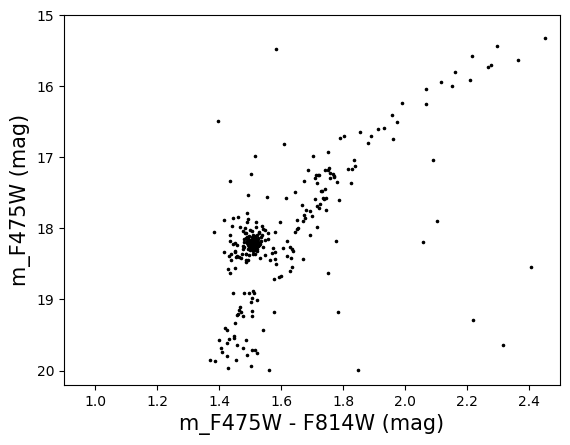

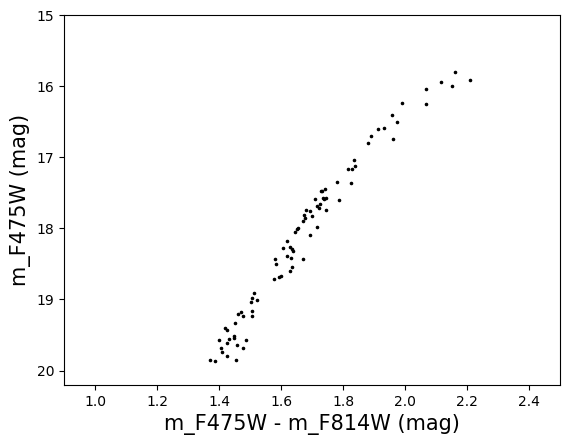

84


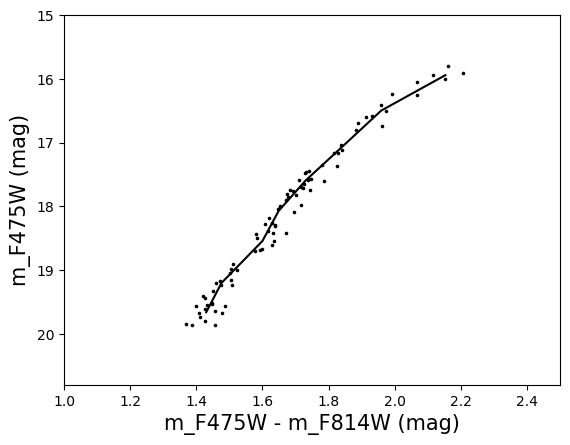

0.039222804969879635


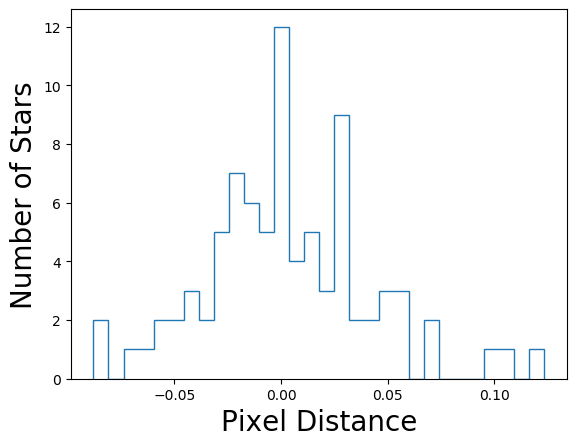

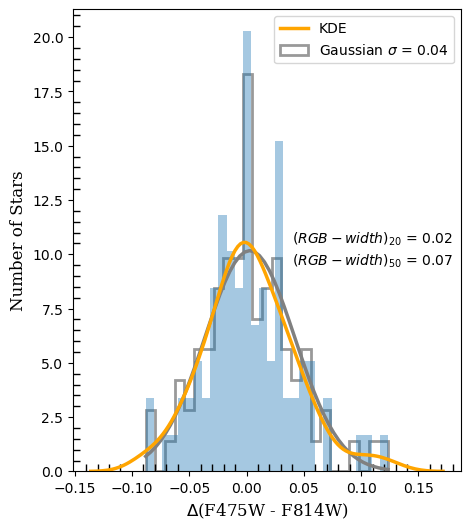

0.002845238095238086 0.039222804969879635
0.02469999999999999
0.06174999999999997


In [50]:
# ******************************************Start of F475W and F814W**************************************

second_df = pd.DataFrame({'x_data_2':x_data_2, 'y_data_2':y_data_2})
second_df_cut = second_df[(second_df['x_data_2']<=2.72 ) & (second_df['x_data_2']>=1.37) & (second_df['y_data_2']<=20.0) & (second_df['y_data_2']>=15.1)]
#print(second_df_cut)
second_df_cut.to_csv("second_df_cut_475_814_alt.csv")
second_df_cut_index = second_df_cut[(second_df_cut.x_data_2 < 1.6) & (second_df_cut.y_data_2 < 18.4 )].index.to_numpy()
#second_df_cut_1 = second_df_cut.drop(second_df_cut_index)
#print(second_df_cut_1)
#second_df_cut_1.to_csv("second_df_cut_475_814_alt.csv")
second_df_cut_1 = pd.read_csv('RGB_475_814_vs_814_data')

plt.figure()
#plt.scatter(x_data_2, y_data_2, 0.3, 'red')
plt.scatter(second_df_cut.x_data_2, second_df_cut.y_data_2, 2.5, 'black')
plt.xlim(0.9,2.5)
plt.ylim(15, 20.2)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
#plt.title("RGB of NGC 411 for F475W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.scatter(second_df_cut_1.x_data_2, second_df_cut_1.y_data_2, 2.5, 'black')
plt.xlim(0.9,2.5)
plt.ylim(15, 20.2)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
#plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()
print(len(second_df_cut_1))
#define a dataframe for x data and y data
second_df_new= pd.DataFrame({'x_data_2':second_df_cut_1.x_data_2,'y_data_2':second_df_cut_1.y_data_2})
second_df_new.to_csv("second_df_new_hist")
#print(df_new)

second_df1_new = second_df_new[(second_df_new['x_data_2']<=2.73) & (second_df_new['x_data_2']>=1.37 ) & (second_df_new['y_data_2']<=20.0) & (second_df_new['y_data_2']>=15.1)]
#print(df1_new)
bins = np.linspace(15.1,20.0, num=10) # These are number of bins

md_2 = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = second_df1_new[(second_df1_new['y_data_2'] >= bins[i]) & (second_df1_new['y_data_2'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_2'])
    y_median = np.median(tempdf['y_data_2'])
    md_2.iloc[i]=[x_median, y_median]
    
#print(md)
plt.figure()
plt.plot(md_2['x_med'], md_2['y_med'], 'black')
plt.scatter(second_df1_new['x_data_2'], second_df1_new['y_data_2'], 2.5, 'black', zorder=0) # zorder= is used when you are lazy. 
plt.xlim(1., 2.5)
plt.ylim(15, 20.8)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
#plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

second_a = pd.cut(second_df1_new.y_data_2, bins)
second_b = second_df1_new.groupby(['y_data_2', second_a]).y_data_2.median()

second_df2 = pd.DataFrame({'values':second_b})
np.savetxt('cut_group_1.txt', second_df2)

second_df1_new['x_diff_new_2'] = second_df1_new.groupby(second_a).apply(lambda grp: grp.x_data_2 - grp.x_data_2.median()).values
np.savetxt('second_hist', second_df1_new.x_diff_new_2)
plt.hist(second_df1_new.x_diff_new_2, bins=30,histtype='step')
print(np.std(second_df1_new.x_diff_new_2))
#plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.20, 0.21)
plt.show()

plt.figure(figsize=(5,6))
data2 = second_df1_new.x_diff_new_2
mu, std = norm.fit(data2)
plt.hist(data2, bins=25, density=True, alpha=0.8, color='grey', histtype='step', linewidth=2.0,label='Gaussian $\sigma$ = 0.04' )
x_min2= np.min(data2)
#print(x_min1)
x_max2 = np.max(data2)
#print(x_max1)
x_norm = np.linspace(x_min2, x_max2)
#print(x_norm)
p = norm.pdf(x_norm, mu, std)
plt.plot(x_norm, p, 'grey', linewidth=2.5)
sns.distplot(data2, 30, kde_kws={"color": "orange", "lw": 2.5, "label": "KDE"} )
plt.minorticks_on()
plt.tick_params(which='minor', length=5, width=1, direction='in')
plt.xlabel('$\Delta$(F475W - F814W)', fontsize=12, **csfont)
plt.ylabel('Number of Stars', fontsize=12, **csfont)
plt.text(0.04, 10.5, '$(RGB-width)_{20}$ = 0.02')
plt.text(0.04, 9.5, '$(RGB-width)_{50}$ = 0.07')
plt.show()
print(mu,std)
data2_per = np.percentile(second_df1_new.x_diff_new_2,80)
#print(data2_per)
twenty_2 = 0.2 * np.max(second_df1_new.x_diff_new_2)
fifty_2 = 0.5 * np.max(second_df1_new.x_diff_new_2)
print(twenty_2)
print(fifty_2)
# ********************************************End of F475W and F814W***

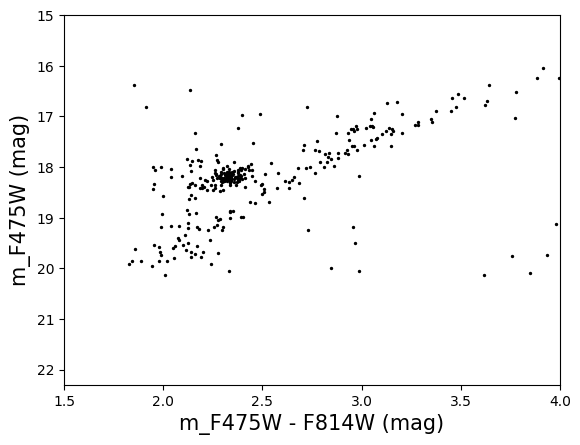

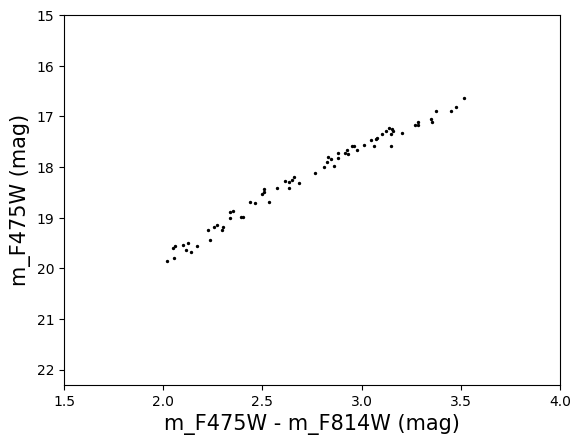

69


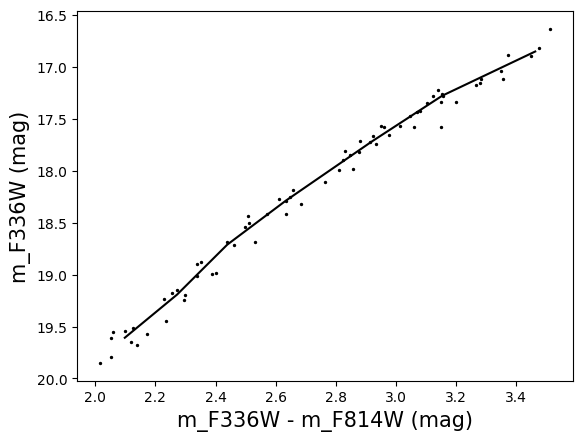

0.076343563150606


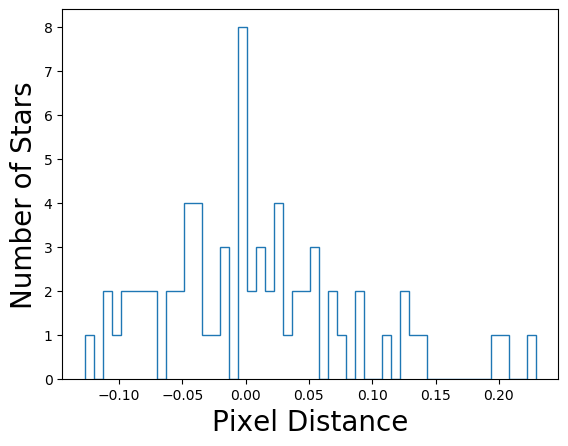

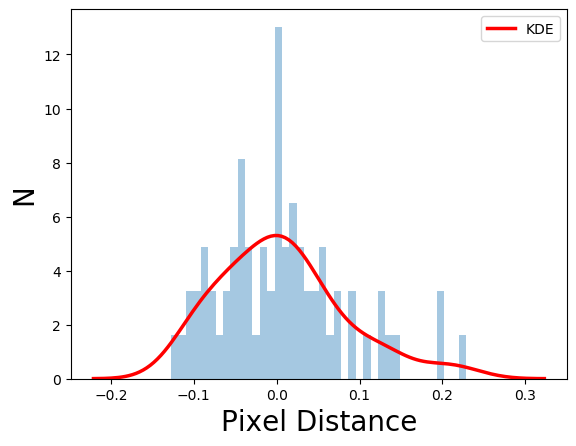

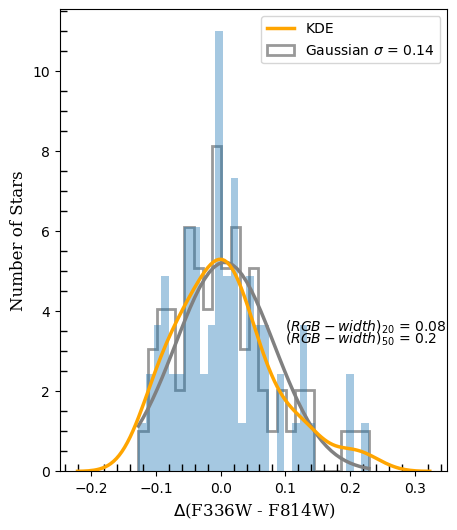

0.006391304347826052 0.076343563150606
0.04579999999999993
0.11449999999999982


In [68]:
# ********************************************Start of F336W and F814W**************************************************

# For F336W and F814W filters
third_df = pd.DataFrame({'x_data_3':x_data_3, 'y_data_3':y_data_3})
#print(third_df)
third_df_cut = third_df[(third_df['x_data_3']<=4) & (third_df['x_data_3']>= 1.8) & (third_df['y_data_3']<=20.2) & (third_df['y_data_3']>=16)]
#third_df_cut.to_csv("third_df_cut_336_814_alt.csv")
#print(third_df_cut)
third_df_cut_index = third_df_cut[(third_df_cut.x_data_3 < 2.4) & (third_df_cut.y_data_3 < 18.50)].index.to_numpy()
#third_df_cut_1 = third_df_cut.drop(third_df_cut_index)
#print(len(third_df_cut_1))

third_df_cut_1 = pd.read_csv('RGB_336_814_vs_814_data')

plt.figure()
plt.scatter(third_df_cut.x_data_3, third_df_cut.y_data_3, 2.0, 'black')
plt.xlim(1.5,4)
plt.ylim(15., 22.3)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
#plt.title("RGB of NGC 411 for F336W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.scatter(third_df_cut_1.x_data_3, third_df_cut_1.y_data_3, 2.0, 'black')
plt.xlim(1.5,4)
plt.ylim(15., 22.3)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
#plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
third_df_new= pd.DataFrame({'x_data_3':third_df_cut_1.x_data_3,'y_data_3':third_df_cut_1.y_data_3})
#print(df_new)

third_df1_new = third_df_new[(third_df_new['x_data_3']<=4) & (third_df_new['x_data_3']>= 1.8) & (third_df_new['y_data_3']<=20.5) & (third_df_new['y_data_3']>=16.5)]
print(len(third_df1_new))
bins = np.linspace(16.5,20.5, num=9) # These are number of bins

md_3 = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = third_df1_new[(third_df1_new['y_data_3'] >= bins[i]) & (third_df1_new['y_data_3'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_3'])
    y_median = np.median(tempdf['y_data_3'])
    md_3.iloc[i]=[x_median, y_median]
    
#print(md)

plt.figure()
plt.plot(md_3['x_med'], md_3['y_med'], 'black')
plt.scatter(third_df1_new['x_data_3'], third_df1_new['y_data_3'], 2.0, 'black', zorder=0) # zorder= is used when you are lazy. 
#plt.xlim(1.45, 3.5)
#plt.ylim(19.7, 21.9)
plt.xlabel('m_F336W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
#plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

third_a = pd.cut(third_df1_new.y_data_3, bins)
third_b = third_df1_new.groupby(['y_data_3', third_a]).y_data_3.median()

third_df2 = pd.DataFrame({'values':third_b})
np.savetxt('cut_group_1.txt', third_df2)

third_df1_new['x_diff_new_3'] = third_df1_new.groupby(third_a).apply(lambda grp: grp.x_data_3 - grp.x_data_3.median()).values
plt.hist(third_df1_new.x_diff_new_3, bins=50,histtype='step' )
print(np.std(third_df1_new.x_diff_new_3))
#plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.10, 0.11)
plt.show()

sns.distplot(third_df1_new.x_diff_new_3,40,kde_kws={"color": "red", "lw": 2.5, "label": "KDE"} )
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.show()

plt.figure(figsize=(5,6))
data3  = third_df1_new.x_diff_new_3
mu, std = norm.fit(data3)
plt.hist(data3, bins=25, density=True, alpha=0.8, color='grey', histtype='step', linewidth=2.0, label='Gaussian $\sigma$ = 0.14')
x_min3= np.min(data3)
#print(x_min1)
x_max3 = np.max(data3)
#print(x_max1)
x_norm = np.linspace(x_min3, x_max3)
#print(x_norm)
p = norm.pdf(x_norm, mu, std)
plt.plot(x_norm, p, 'grey', linewidth=2.5)
sns.distplot(data3, 30, kde_kws={"color": "orange", "lw": 2.5, "label": "KDE"} )
plt.minorticks_on()
plt.tick_params(which='minor', length=5, width=1, direction='in')
plt.xlabel('$\Delta$(F336W - F814W)', fontsize=12, **csfont)
plt.ylabel('Number of Stars', fontsize=12, **csfont)
plt.text(0.1, 3.5, '$(RGB-width)_{20}$ = 0.08')
plt.text(0.1, 3.2, '$(RGB-width)_{50}$ = 0.2')
plt.show()
print(mu,std)
data3_per = np.percentile(third_df1_new.x_diff_new_3,80)
#print(data3_per)
twenty_3 = 0.2 * np.max(third_df1_new.x_diff_new_3)
fifty_3 = 0.5 * np.max(third_df1_new.x_diff_new_3)
print(twenty_3)
print(fifty_3)
#*****************************************End of F336W and F814W*******